## 1. IMPORTING LIBRARIES

In [1]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import the useful libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style

pd.set_option('display.max_columns', 100) # to display all the columns
pd.set_option('display.max_rows', 100) # to display all the rows
pd.set_option('display.width', 500)

## 2. IMPORTING DATA

In [3]:
NewApp = pd.read_csv("application_data.csv")
PreviousApp = pd.read_csv("previous_application.csv")

### 2.1 Inspecting Application Data Frame

In [4]:
NewApp.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single /

In [5]:
# Checking the number of rows and columns in the dataframe

NewApp.shape

(307511, 122)

In [6]:
NewApp.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [7]:
# Checking summary for numeric columns

NewApp.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,...,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,...,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,...,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.977752,0.755746,0.044595,0.078078,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192

### 2.2 Inspecting Previous Data Frame

In [8]:
PreviousApp.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Checking the number of rows and columns in the dataframe

PreviousApp.shape

(1670214, 37)

In [10]:
PreviousApp.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [11]:
# Checking summary for numeric columns

PreviousApp.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


## 3. Data Cleaning and Manipulation

### 3.1 Checking the NewApp Data Set.

In [12]:
#Checking for null values

NewApp.isnull().sum().sort_values(ascending=False)

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
                             ...  
NAME_HOUSING_TYPE                0
NAME_FAMILY_STATUS               0
NAME_EDUCATION_TYPE              0
NAME_INCOME_TYPE                 0
SK_ID_CURR                       0
Length: 122, dtype: int64

In [13]:
# Finding the percentage of missing values in all columns

null_value = round(NewApp.isnull().mean()*100,2).sort_values(ascending = False)

In [14]:
# List of Columns with missing percentage >= 35%

null_value =null_value[null_value>=35]
null_value

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

### 3.2 Imputing/Removing Null Values

In [15]:
# Keeping all columns with <= 35% null values

NewApp = NewApp.loc[:,NewApp.isnull().mean() <= 0.35]
NewApp.shape

(307511, 73)

In [16]:
# Verify missing columns <= 35%

round(NewApp.isnull().mean()*100,2).sort_values(ascending = False)

OCCUPATION_TYPE                31.35
EXT_SOURCE_3                   19.83
AMT_REQ_CREDIT_BUREAU_YEAR     13.50
AMT_REQ_CREDIT_BUREAU_QRT      13.50
AMT_REQ_CREDIT_BUREAU_MON      13.50
AMT_REQ_CREDIT_BUREAU_WEEK     13.50
AMT_REQ_CREDIT_BUREAU_DAY      13.50
AMT_REQ_CREDIT_BUREAU_HOUR     13.50
NAME_TYPE_SUITE                 0.42
OBS_30_CNT_SOCIAL_CIRCLE        0.33
DEF_30_CNT_SOCIAL_CIRCLE        0.33
OBS_60_CNT_SOCIAL_CIRCLE        0.33
DEF_60_CNT_SOCIAL_CIRCLE        0.33
EXT_SOURCE_2                    0.21
AMT_GOODS_PRICE                 0.09
FLAG_DOCUMENT_7                 0.00
DAYS_LAST_PHONE_CHANGE          0.00
FLAG_DOCUMENT_2                 0.00
FLAG_DOCUMENT_3                 0.00
FLAG_DOCUMENT_4                 0.00
FLAG_DOCUMENT_5                 0.00
FLAG_DOCUMENT_6                 0.00
FLAG_DOCUMENT_11                0.00
FLAG_DOCUMENT_8                 0.00
FLAG_DOCUMENT_9                 0.00
FLAG_DOCUMENT_10                0.00
LIVE_CITY_NOT_WORK_CITY         0.00
F

#### 3.2.1 OCCUPATION_TYPE

In [17]:
NewApp['OCCUPATION_TYPE'].head()

0      Laborers
1    Core staff
2      Laborers
3      Laborers
4    Core staff
Name: OCCUPATION_TYPE, dtype: object

In [18]:
NewApp.OCCUPATION_TYPE.describe()

count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object

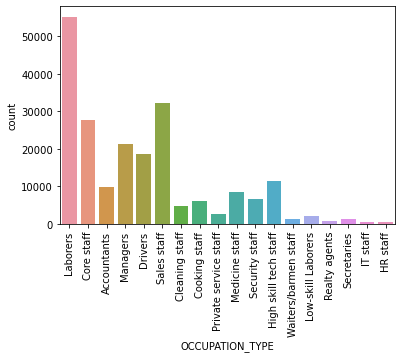

In [19]:
sns.countplot(x='OCCUPATION_TYPE', data=NewApp)
plt.xticks(rotation = 90);

#### We cannot replace all the 31% missing values with Laborers as it would be unfair. So we will leave it as it is and not do any missing value treatment here.


#### 3.2.2 EXT_SOURCE_3

In [20]:
NewApp.EXT_SOURCE_3.describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

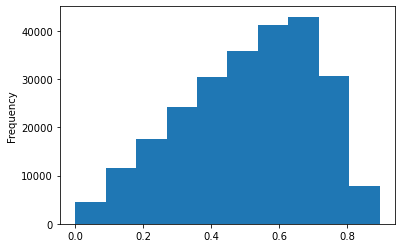

In [21]:
NewApp.EXT_SOURCE_3.plot.hist()
plt.show()

In [22]:
NewApp.EXT_SOURCE_3.mode()

0    0.7463
dtype: float64

In [23]:
# Replacing null values in EXT_SOURCE_3 with its mode value

NewApp.EXT_SOURCE_3.fillna(NewApp.EXT_SOURCE_3.mode()[0], inplace=True)

#### 3.2.3 AMT_REQ_CREDIT_BUREAU_YEAR

In [24]:
NewApp['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
18.0        4
19.0        4
16.0        3
25.0        1
21.0        1
22.0        1
20.0        1
23.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [25]:
NewApp['AMT_REQ_CREDIT_BUREAU_YEAR'].describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [26]:
NewApp['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()

0    0.0
dtype: float64

In [27]:
# Replacing null values in AMT_REQ_CREDIT_BUREAU_YEAR with its mode value

NewApp.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(NewApp['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0], inplace=True)

#### 3.2.4 AMT_REQ_CREDIT_BUREAU_QRT

In [28]:
NewApp['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [29]:
NewApp['AMT_REQ_CREDIT_BUREAU_QRT'].describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [30]:
NewApp['AMT_REQ_CREDIT_BUREAU_QRT'].mode()

0    0.0
dtype: float64

In [31]:
# Replacing null values in AMT_REQ_CREDIT_BUREAU_QRT with its mode value

NewApp.AMT_REQ_CREDIT_BUREAU_QRT.fillna(NewApp['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0], inplace=True)

#### 3.2.5 AMT_REQ_CREDIT_BUREAU_MON

In [32]:
NewApp['AMT_REQ_CREDIT_BUREAU_MON'].value_counts()

0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
27.0         1
22.0         1
23.0         1
24.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [33]:
NewApp['AMT_REQ_CREDIT_BUREAU_MON'].mode()

0    0.0
dtype: float64

In [34]:
# Replacing null values in AMT_REQ_CREDIT_BUREAU_MON with its mode value

NewApp.AMT_REQ_CREDIT_BUREAU_MON.fillna(NewApp['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0], inplace=True)

#### 3.2.6 AMT_REQ_CREDIT_BUREAU_WEEK

In [35]:
NewApp['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts()

0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [36]:
NewApp['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()

0    0.0
dtype: float64

In [37]:
# Replacing null values in AMT_REQ_CREDIT_BUREAU_WEEK with its mode value

NewApp.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(NewApp['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()[0], inplace=True)

#### 3.2.7 AMT_REQ_CREDIT_BUREAU_DAY

In [38]:
NewApp['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts()

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [39]:
NewApp['AMT_REQ_CREDIT_BUREAU_DAY'].mode()

0    0.0
dtype: float64

In [40]:
# Replacing null values in AMT_REQ_CREDIT_BUREAU_DAY with its mode value

NewApp.AMT_REQ_CREDIT_BUREAU_DAY.fillna(NewApp['AMT_REQ_CREDIT_BUREAU_DAY'].mode()[0], inplace=True)

#### 3.2.8 AMT_REQ_CREDIT_BUREAU_HOUR

In [41]:
NewApp['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts()

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [42]:
NewApp['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()

0    0.0
dtype: float64

In [43]:
# Replacing null values in AMT_REQ_CREDIT_BUREAU_HOUR with its mode value

NewApp.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(NewApp['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0], inplace=True)

#### 3.2.9 AMT_GOODS_PRICE

In [44]:
NewApp['AMT_GOODS_PRICE'].value_counts()

450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
592452.0         1
1130125.5        1
362632.5         1
498856.5         1
1271875.5        1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

In [45]:
NewApp['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [46]:
NewApp['AMT_GOODS_PRICE'].median()

450000.0

In [47]:
# Replacing null values in AMT_GOODS_PRICE with its median value

NewApp.AMT_GOODS_PRICE.fillna(NewApp['AMT_GOODS_PRICE'].median(), inplace=True)

#### 3.2.10 EXT_SOURCE_2

In [48]:
NewApp['EXT_SOURCE_2'].value_counts()

0.285898    721
0.262258    417
0.265256    343
0.159679    322
0.265312    306
           ... 
0.157007      1
0.721955      1
0.032513      1
0.204329      1
0.064909      1
Name: EXT_SOURCE_2, Length: 119831, dtype: int64

In [49]:
NewApp['EXT_SOURCE_2'].describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

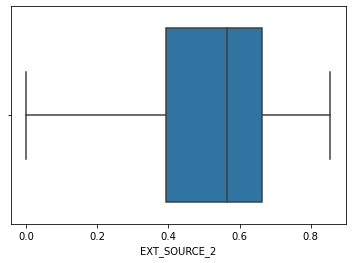

In [50]:
#PLotting boxplot to check for any outliers

sns.boxplot(NewApp['EXT_SOURCE_2'])
plt.show()

In [51]:
NewApp['EXT_SOURCE_2'].mean()

0.5143926741308463

In [52]:
NewApp['EXT_SOURCE_2'].median()

0.5659614260608526

In [53]:
# Replacing null values in EXT_SOURCE_2 with its mean value

NewApp.EXT_SOURCE_2.fillna(NewApp['EXT_SOURCE_2'].mean(), inplace=True)

#### 3.2.11 NAME_TYPE_SUITE

In [54]:
NewApp['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [55]:
NewApp['NAME_TYPE_SUITE'].mode()

0    Unaccompanied
dtype: object

In [56]:
# Replacing null values in NAME_TYPE_SUITE with its mode value

NewApp.NAME_TYPE_SUITE.fillna(NewApp['NAME_TYPE_SUITE'].mode()[0], inplace=True)

#### 3.2.12 OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE

In [57]:
NewApp['OBS_30_CNT_SOCIAL_CIRCLE'].value_counts()

0.0      163910
1.0       48783
2.0       29808
3.0       20322
4.0       14143
5.0        9553
6.0        6453
7.0        4390
8.0        2967
9.0        2003
10.0       1376
11.0        852
12.0        652
13.0        411
14.0        258
15.0        166
16.0        133
17.0         88
18.0         46
19.0         44
20.0         30
21.0         29
22.0         22
23.0         15
24.0         11
25.0         11
27.0          5
26.0          3
30.0          2
348.0         1
28.0          1
47.0          1
29.0          1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [58]:
NewApp['OBS_30_CNT_SOCIAL_CIRCLE'].mode()

0    0.0
dtype: float64

In [59]:
# Similarly replacing the null values with its mode value

NewApp.OBS_30_CNT_SOCIAL_CIRCLE.fillna(NewApp['OBS_30_CNT_SOCIAL_CIRCLE'].mode()[0], inplace=True)
NewApp.DEF_30_CNT_SOCIAL_CIRCLE.fillna(NewApp['DEF_30_CNT_SOCIAL_CIRCLE'].mode()[0], inplace=True)
NewApp.OBS_60_CNT_SOCIAL_CIRCLE.fillna(NewApp['OBS_60_CNT_SOCIAL_CIRCLE'].mode()[0], inplace=True)
NewApp.DEF_60_CNT_SOCIAL_CIRCLE.fillna(NewApp['DEF_60_CNT_SOCIAL_CIRCLE'].mode()[0], inplace=True)

#### 3.2.13 # Checking the values present in columns starting with 'DAYS'

In [60]:
print(NewApp['DAYS_BIRTH'].unique())
print(NewApp['DAYS_EMPLOYED'].unique())
print(NewApp['DAYS_REGISTRATION'].unique())
print(NewApp['DAYS_ID_PUBLISH'].unique())
print(NewApp['DAYS_LAST_PHONE_CHANGE'].unique())

[ -9461 -16765 -19046 ...  -7951  -7857 -25061]
[  -637  -1188   -225 ... -12971 -11084  -8694]
[ -3648.  -1186.  -4260. ... -16396. -14558. -14798.]
[-2120  -291 -2531 ... -6194 -5854 -6211]
[-1134.  -828.  -815. ... -3988. -3899. -3538.]


In [61]:
# Storing columns starting with 'DAYS' into variable
days_col = [col for col in NewApp if col.startswith('DAYS')]
days_col

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [62]:
# Applying abs() function to columns starting with 'DAYS' to convert the negative values to positive

NewApp[days_col]= abs(NewApp[days_col])

In [63]:
NewApp.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.746300,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.746300,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.746300,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### 3.2.14 CODE_GENDER

In [64]:
NewApp.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [65]:
# Dropping the XNA from CODE_GENDER

NewApp = NewApp[NewApp['CODE_GENDER']!='XNA']

In [66]:
NewApp.CODE_GENDER.value_counts()

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

#### 3.2.15 ORGANIZATION_TYPE

In [67]:
NewApp.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11192
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6879
Construction               6721
Business Entity Type 1     5983
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3277
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [68]:
# Replacing XNA with NaN

NewApp = NewApp.replace('XNA',np.NaN)

In [69]:
NewApp.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11192
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6879
Construction               6721
Business Entity Type 1     5983
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3277
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

### 4. Checking Outliers

#### 4.1 AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY and AMT_GOODS_PRICE

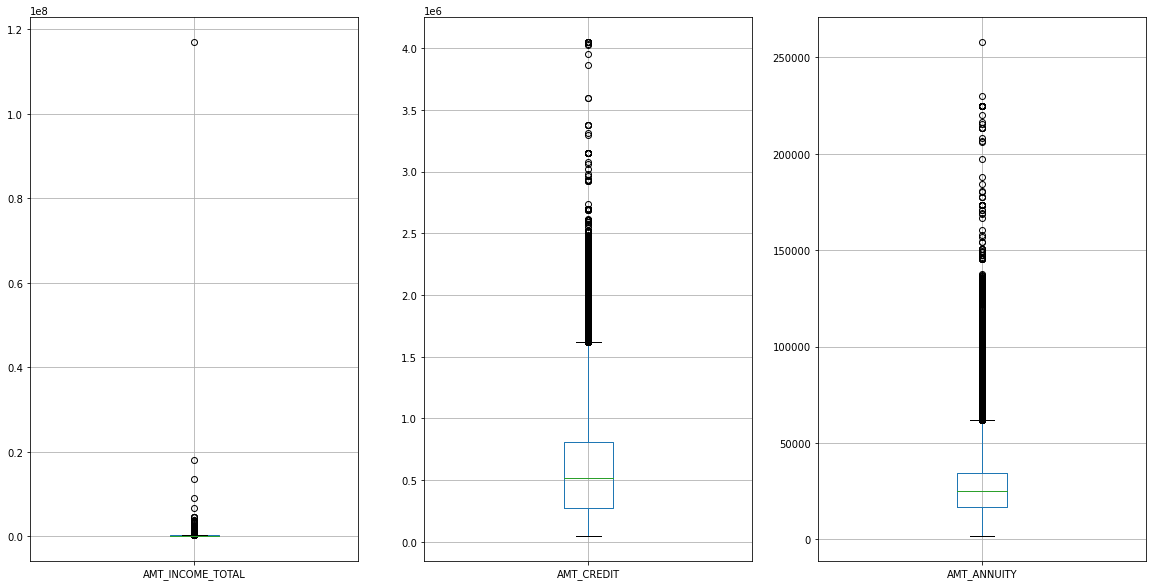

In [70]:
cols1 = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY']
plt.figure(figsize=(20,10))
for i, col in enumerate(cols1):
    plt.subplot(1,3, i+1)
    NewApp.boxplot(column = col, )
plt.show()

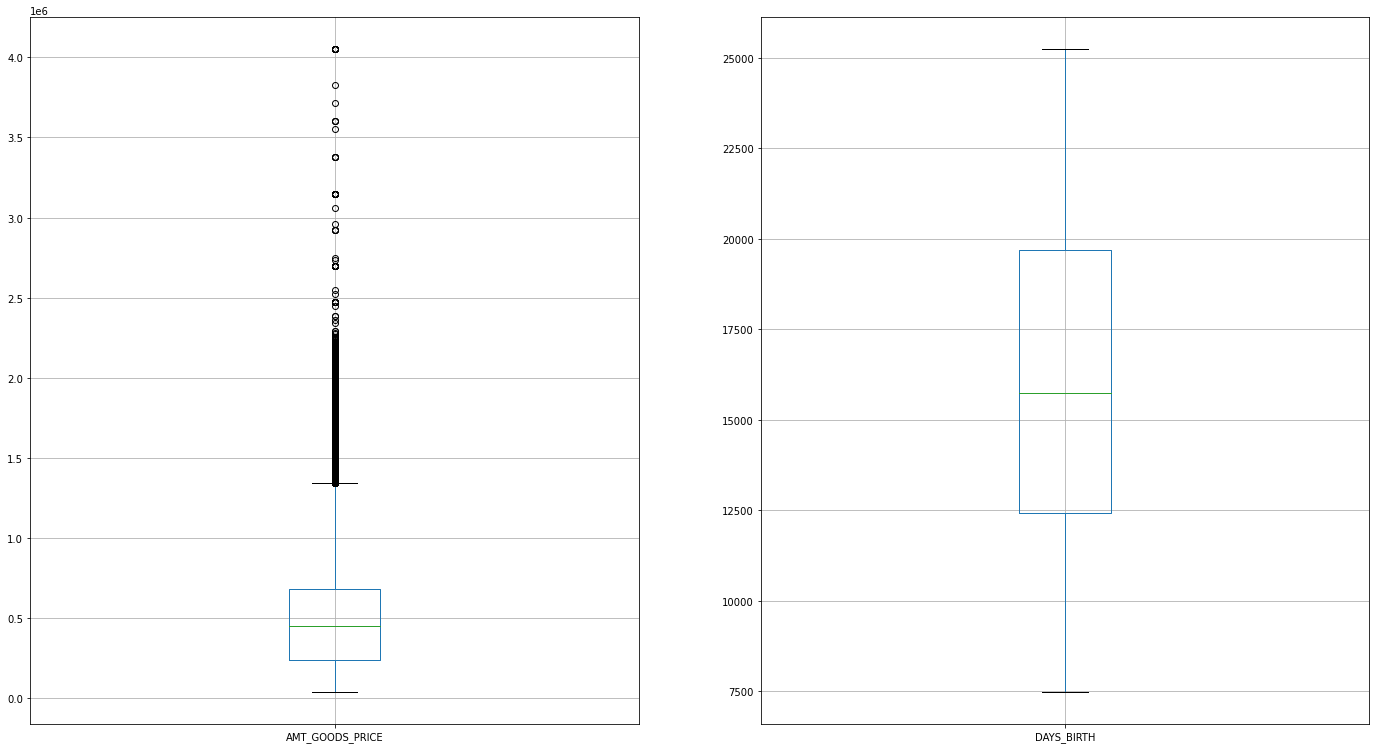

In [71]:
cols2 = ['AMT_GOODS_PRICE','DAYS_BIRTH']
plt.figure(figsize=(24,13))
for i, col in enumerate(cols2):
    plt.subplot(1,2, i+1)
    NewApp.boxplot(column = col, )
plt.show()

#### Looking at the above boxplots, we can conclude that AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE variables have huge outliers.

#### 4.2 DAYS_BIRTH

In [72]:
# Converting 'DAYS_BIRTH' to years

NewApp['DAYS_BIRTH']= (NewApp['DAYS_BIRTH']/365).astype(int)

In [73]:
NewApp['DAYS_BIRTH'].unique()

array([25, 45, 52, 54, 46, 37, 51, 55, 39, 27, 36, 38, 23, 35, 26, 48, 31,
       50, 40, 30, 68, 43, 28, 41, 32, 33, 47, 57, 65, 44, 64, 21, 59, 49,
       56, 62, 53, 42, 29, 67, 63, 61, 58, 60, 34, 22, 24, 66, 69, 20])

In [74]:
# Biining 'DAYS_BIRTH'

NewApp['DAYS_BIRTH_CATEGORY']=pd.cut(NewApp['DAYS_BIRTH'], bins=[19,25,35,60,100], labels=['Very Young','Young', 'Middle Age', 'Senior Citizen'])

In [75]:
NewApp['DAYS_BIRTH_CATEGORY'].value_counts()

Middle Age        185898
Young              75923
Senior Citizen     29368
Very Young         16318
Name: DAYS_BIRTH_CATEGORY, dtype: int64

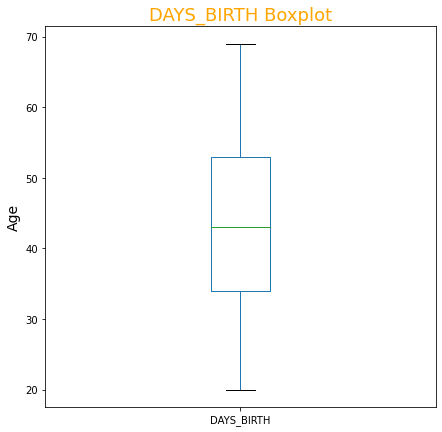

In [76]:
# Boxplot for DAYS_BIRTH

plt.figure(figsize=(7,7))

NewApp.DAYS_BIRTH.plot.box()

plt.title('DAYS_BIRTH Boxplot', fontsize = 18, color = 'Orange')
plt.ylabel('Age', fontsize = 14)

plt.show()

#### We cannot see any outliers in 'DAYS_BIRTH'.

In [77]:
# Binning 'AMT_INCOME_RANGE' based on quantiles

NewApp['AMT_INCOME_RANGE'] = pd.qcut(NewApp.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY HIGH'])
NewApp['AMT_INCOME_RANGE'].head(10)

0       MEDIUM
1         HIGH
2     VERY LOW
3          LOW
4          LOW
5     VERY LOW
6       MEDIUM
7    VERY HIGH
8          LOW
9          LOW
Name: AMT_INCOME_RANGE, dtype: category
Categories (5, object): ['VERY LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY HIGH']

In [78]:
NewApp.AMT_INCOME_RANGE.value_counts()

MEDIUM       106631
LOW           90088
VERY LOW      63671
HIGH          33082
VERY HIGH     14035
Name: AMT_INCOME_RANGE, dtype: int64

## 5. Data Analysis

In [79]:
NewApp['TARGET'].value_counts()

0    282682
1     24825
Name: TARGET, dtype: int64

In [80]:
NewApp['TARGET'].value_counts(normalize=True)*100

0    91.927013
1     8.072987
Name: TARGET, dtype: float64

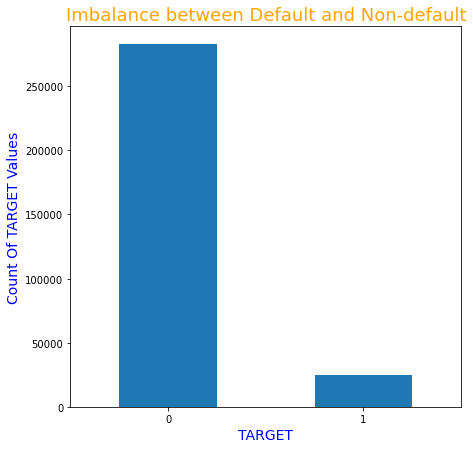

In [81]:
# Barplot for TARGET values

plt.figure(figsize=[7,7])

NewApp.TARGET.value_counts().plot.bar()

plt.title('Imbalance between Default and Non-default', fontsize = 18, color = 'Orange')

plt.xlabel("TARGET", fontsize = 14, color = 'Blue')
plt.ylabel("Count Of TARGET Values", fontsize = 14, color = 'Blue')

plt.xticks(rotation = 0)

plt.show()

In [82]:
# Lets calculate the ratio of imbalance

round((NewApp.TARGET==0).sum()/(NewApp.TARGET==1).sum(),2)

11.39

#### There is a large imbalance between the proportion of default and non-default in the dataset. The ratio of non-deafult to default is 11.39:1. Though the default ratio is low, it should be analysed closely.

In [83]:
# Creating dataframe with TARGET = 1 (Default)
target_1 = NewApp.loc[NewApp['TARGET'] == 1]
display(target_1.head())

# Creating dataframe with TARGET = 0 (Non - Default)
target_0 = NewApp.loc[NewApp['TARGET'] == 0]
display(target_0.head())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_BIRTH_CATEGORY,AMT_INCOME_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Very Young,MEDIUM
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,51,2628,6573.0,1827,1,1,0,1,0,0,Cooking staff,1.0,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,0.190706,10.0,1.0,10.0,0.0,161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0,Middle Age,LOW
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,47,1262,1182.0,1029,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.0,0.0,0.0,0.0,1075.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0,Middle Age,MEDIUM
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,36,3597,45.0,4409,1,1,1,1,1,0,Sales staff,2.0,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.674203,0.399676,1.0,0.0,1.0,0.0,1480.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,Middle Age,LOW
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,67,365243,5391.0,4199,1,0,0,1,0,0,NaN,2.0,2,2,THURSDAY,10,0,0,0,0,0,0,NaN,0.023952,0.720944,1.0,1.0,1.0,1.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Senior Citizen,VERY LOW


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_BIRTH_CATEGORY,AMT_INCOME_RANGE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.746300,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Middle Age,HIGH
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Middle Age,VERY LOW
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.746300,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Middle Age,LOW
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.746300,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Middle Age,LOW
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,46,1588,4970.0,477,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,Middle Age,VERY LOW


### 5.1 Univariate Analysis

#### 5.1.1 Gender Distribution

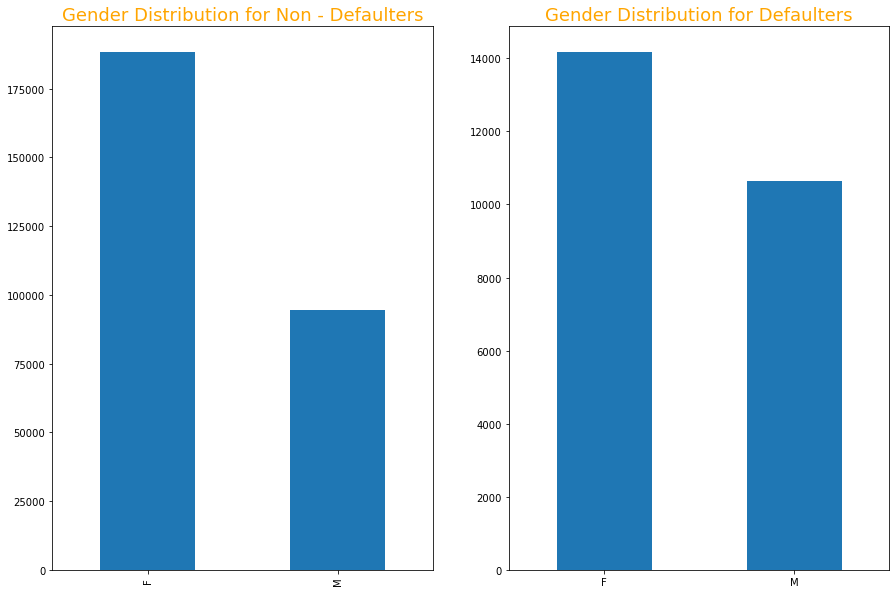

In [84]:
# Gender Distribution for Defaulters and Non-Defaulters

f, ax = plt.subplots(1, 2, figsize=[15,10])

target_0['CODE_GENDER'].value_counts().plot(kind='bar', ax=ax[0])
target_1['CODE_GENDER'].value_counts().plot(kind='bar', ax=ax[1])

ax[0].set_title('Gender Distribution for Non - Defaulters', fontsize = 18, color = 'Orange')
ax[1].set_title('Gender Distribution for Defaulters', fontsize = 18, color = 'Orange')

plt.xticks(rotation = 0)

plt.show()

#### 5.1.2 Income Sources

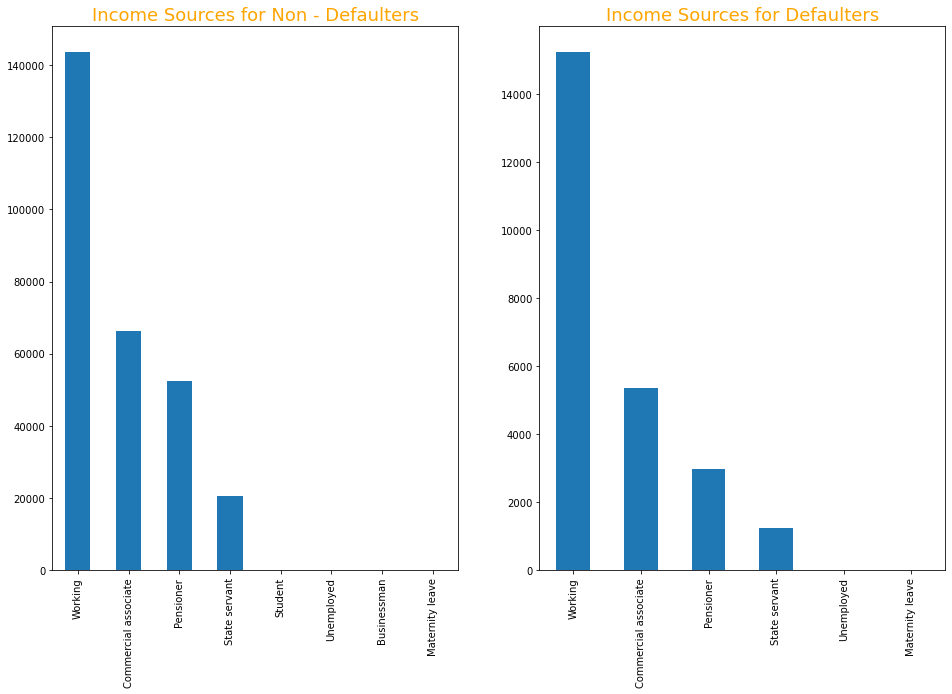

In [85]:
# Income Sources for Defaulters and Non-Defaulters

f, ax = plt.subplots(1, 2, figsize=[16,10])

target_0['NAME_INCOME_TYPE'].value_counts().plot(kind='bar', ax=ax[0])
target_1['NAME_INCOME_TYPE'].value_counts().plot(kind='bar', ax=ax[1])

ax[0].set_title('Income Sources for Non - Defaulters', fontsize = 18, color = 'Orange')
ax[1].set_title('Income Sources for Defaulters', fontsize = 18, color = 'Orange')

plt.show()

#### We observe a decrease in the Defaulters who are Pensioners and an increase in the Defaulters who are Working when compared the percentage of both Defaulters and Non-Defaulters.

#### 5.1.3 Age

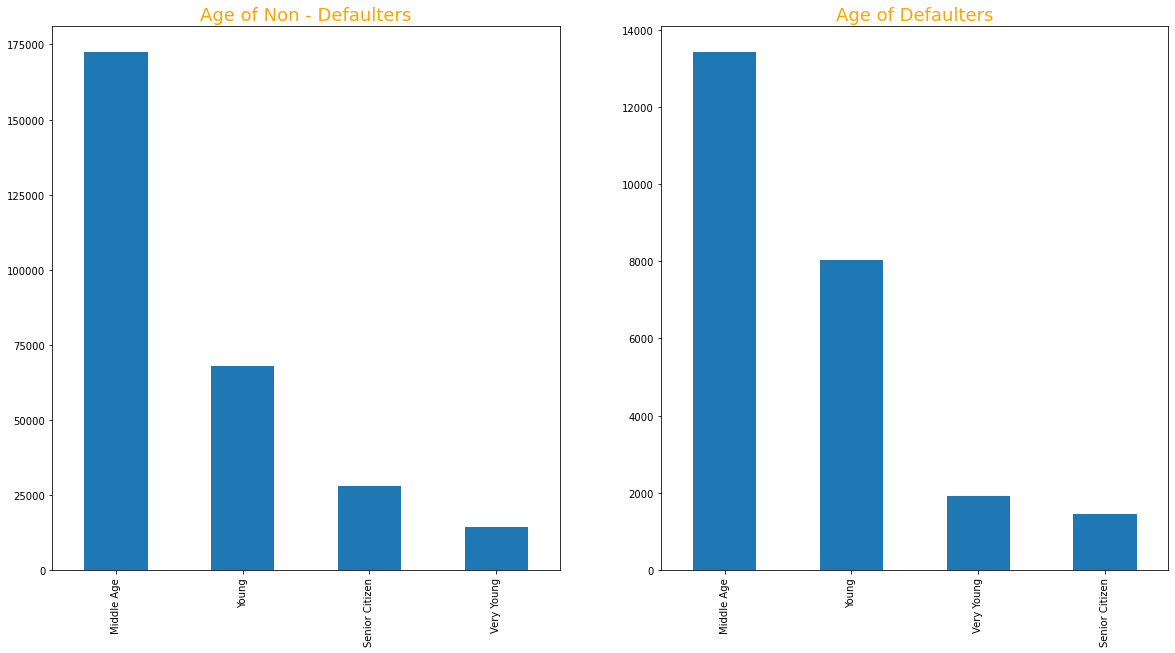

In [86]:
# Age of Defaulters and Non-Defaulters

f, ax = plt.subplots(1, 2, figsize=[20,10])

target_0['DAYS_BIRTH_CATEGORY'].value_counts().plot(kind='bar', ax=ax[0])
target_1['DAYS_BIRTH_CATEGORY'].value_counts().plot(kind='bar', ax=ax[1])

ax[0].set_title('Age of Non - Defaulters', fontsize = 18, color = 'Orange')
ax[1].set_title('Age of Defaulters', fontsize = 18, color = 'Orange')

plt.show()

#### We observe that there is an increase in the Defaulters who are young in age when compared to the percentages of Defaulters and Non Defaulters

#### 5.1.4 Education Type

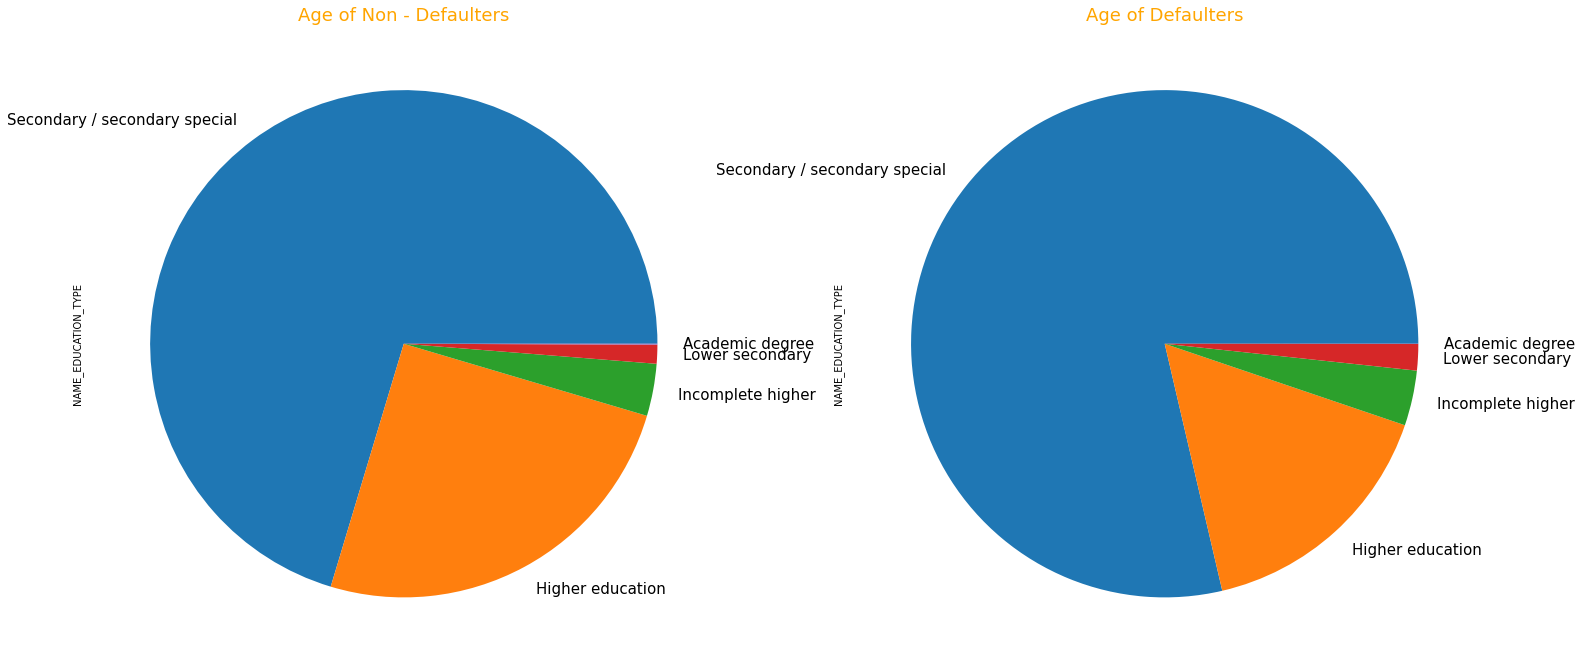

In [87]:
# Education Type of Defaulters and Non-Defaulters

f, ax = plt.subplots(1, 2, figsize=[25,15])

target_0['NAME_EDUCATION_TYPE'].value_counts().plot(kind='pie', ax=ax[0],fontsize=15)
target_1['NAME_EDUCATION_TYPE'].value_counts().plot(kind='pie', ax=ax[1],fontsize=15)

ax[0].set_title('Age of Non - Defaulters', fontsize = 18, color = 'Orange')
ax[1].set_title('Age of Defaulters', fontsize = 18, color = 'Orange')

plt.show()

#### We observe a decrease in the percentage of Defaulters who have completed higher education and increase in the percentage of Defaulters who have secondary/secondary special as their educational qualifications when compared with the percentages of Defaulters and Non - Defaulters.

#### 5.1.5 Family Status

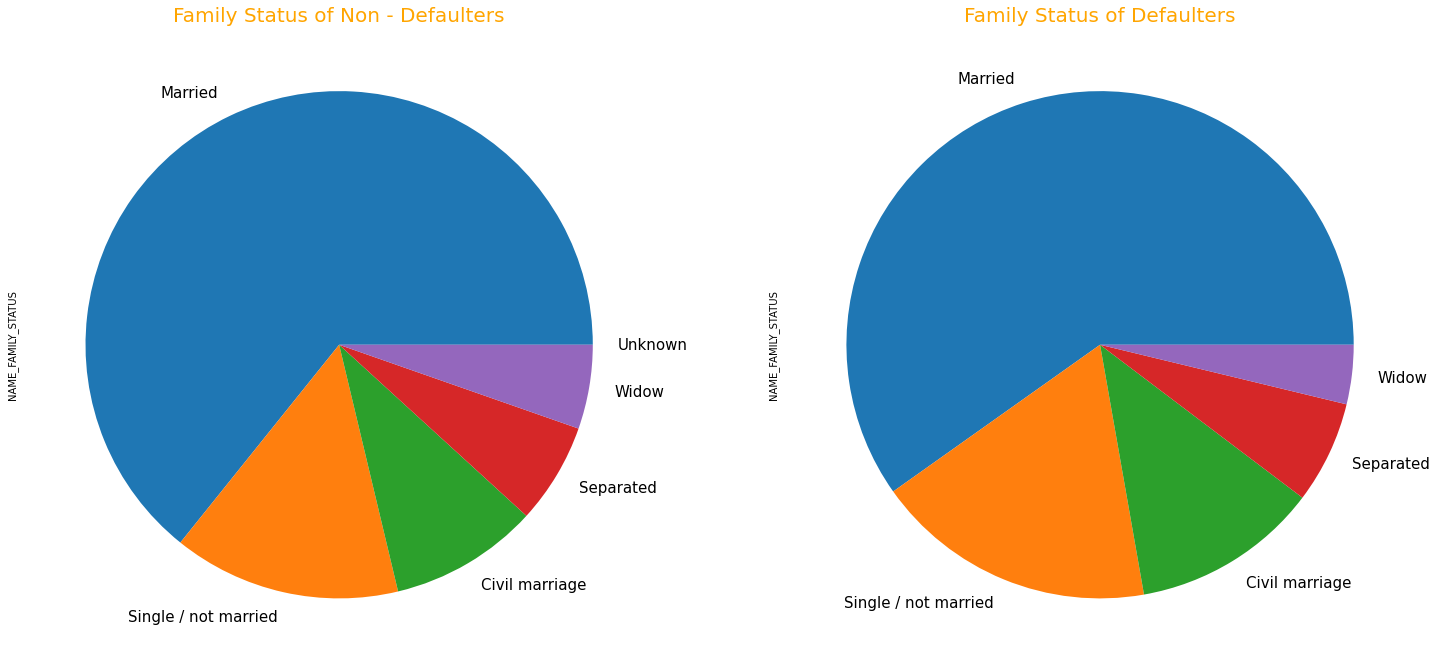

In [88]:
# Family Status of Defaulters and Non-Defaulters

f, ax = plt.subplots(1, 2, figsize=[25,15])

target_0['NAME_FAMILY_STATUS'].value_counts().plot(kind='pie', ax=ax[0],fontsize=15)
target_1['NAME_FAMILY_STATUS'].value_counts().plot(kind='pie', ax=ax[1],fontsize=15)

ax[0].set_title('Family Status of Non - Defaulters', fontsize = 20, color = 'Orange')
ax[1].set_title('Family Status of Defaulters', fontsize = 20, color = 'Orange')


plt.show()

#### We observe an increase in Defaulters for both Single/not married and Civil Marriage, where as there is a decrease in Widow defaulters when compared with both Defaulters and Non-Defaulters.

#### 5.1.6 Housing Type

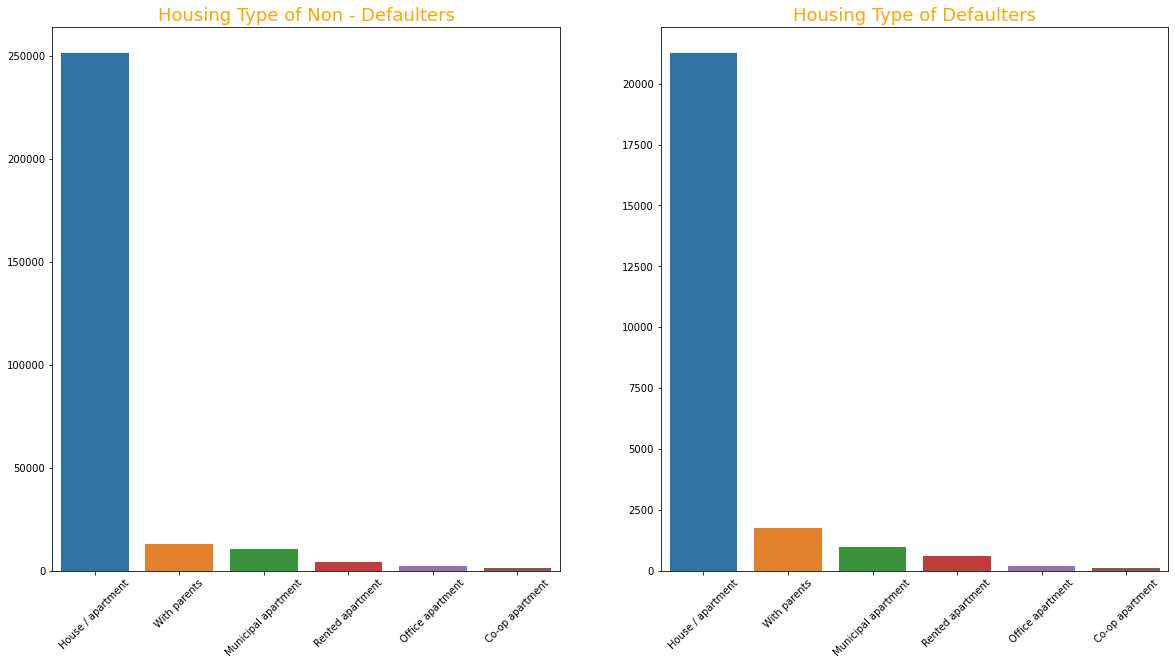

In [89]:
# Housing Type of Defaulters and Non-Defaulters

f, ax = plt.subplots(1, 2, figsize=[20,10])

sns.barplot(ax=ax[0], x=target_0['NAME_HOUSING_TYPE'].value_counts().index, y=target_0['NAME_HOUSING_TYPE'].value_counts().values)
sns.barplot(ax=ax[1], x=target_1['NAME_HOUSING_TYPE'].value_counts().index, y=target_1['NAME_HOUSING_TYPE'].value_counts().values)

ax[0].set_title('Housing Type of Non - Defaulters', fontsize = 18, color = 'Orange')
ax[1].set_title('Housing Type of Defaulters', fontsize = 18, color = 'Orange')

ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation = 45)
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation = 45)


plt.show()

#### We observe an increase in the of Defaulters who live with their parents when compared to both Defaulters and Non-Defaulters.

#### 5.1.7 Type Of Loans

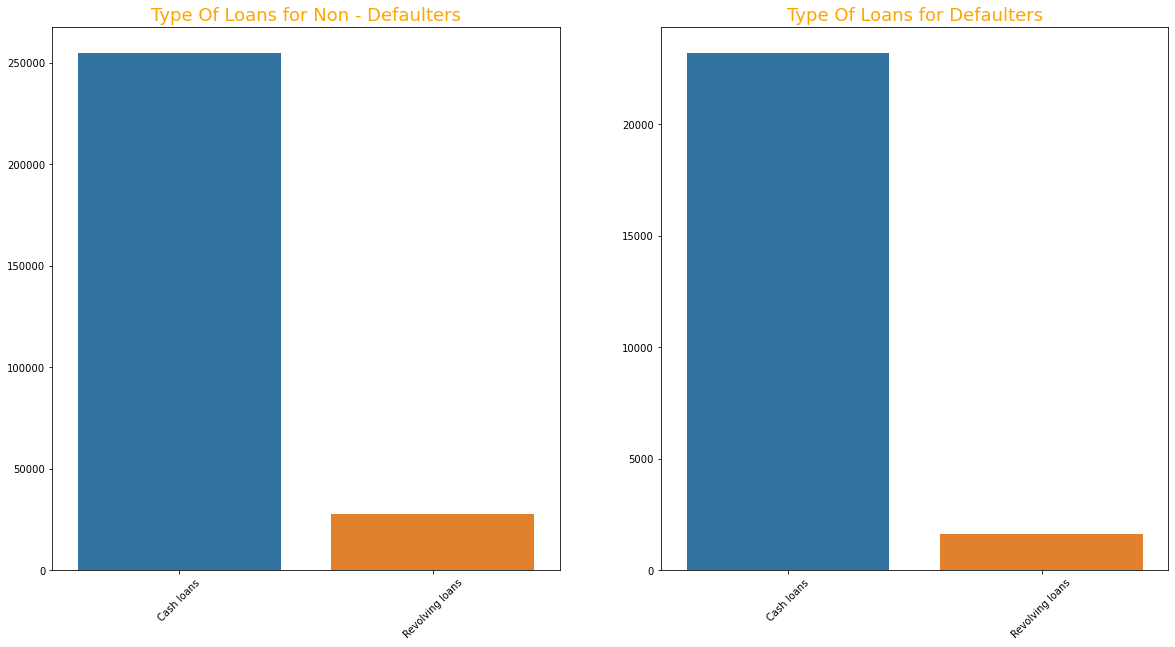

In [90]:
# Type Of Loans for Defaulters and Non-Defaulters

f, ax = plt.subplots(1, 2, figsize=[20,10])

sns.barplot(ax=ax[0], x=target_0['NAME_CONTRACT_TYPE'].value_counts().index, y=target_0['NAME_CONTRACT_TYPE'].value_counts().values)
sns.barplot(ax=ax[1], x=target_1['NAME_CONTRACT_TYPE'].value_counts().index, y=target_1['NAME_CONTRACT_TYPE'].value_counts().values)


ax[0].set_title('Type Of Loans for Non - Defaulters', fontsize = 18, color = 'Orange')
ax[1].set_title('Type Of Loans for Defaulters', fontsize = 18, color = 'Orange')

ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation = 45)
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation = 45)

plt.show()

#### We can observe that cash loans are mostly preferred by both Defaulters and Non-Defaulters. Though there is a significant decrease in  Defaulters who go for revolving loans. 

#### TARGET Analysis for Numerical Variables

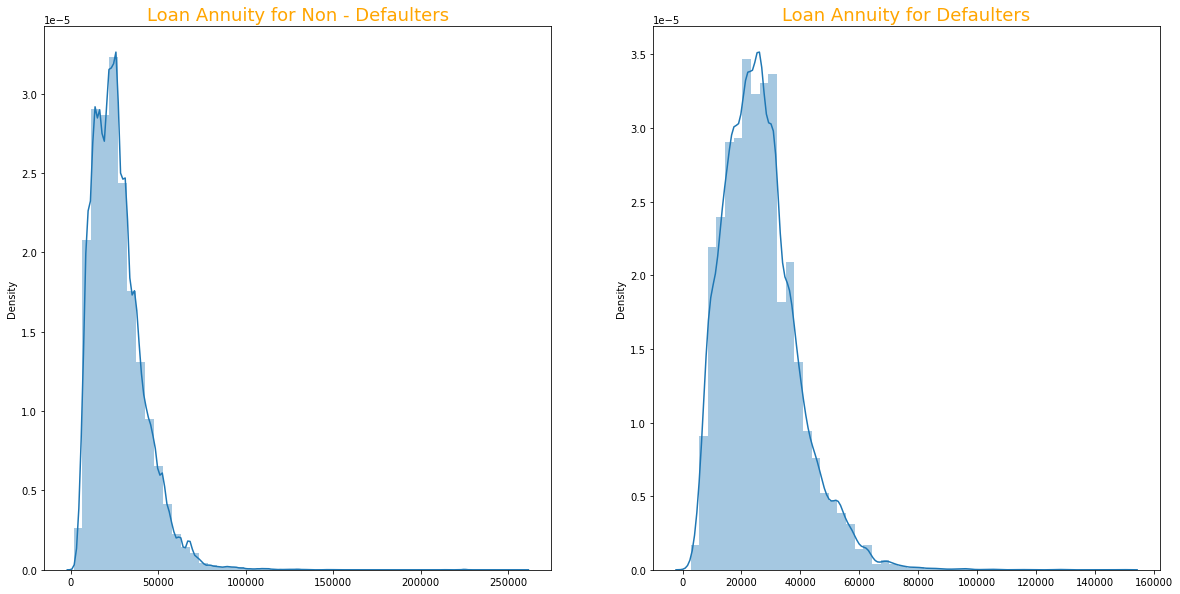

In [91]:
#Loan Annuity for Defaulters and Non-Defaulters

f, ax = plt.subplots(1, 2, figsize=[20,10])

#plt.style.use('ggplot')
plt.style.use("tableau-colorblind10")

sns.distplot(ax=ax[0], x=target_0['AMT_ANNUITY'])
sns.distplot(ax=ax[1], x=target_1['AMT_ANNUITY'])

ax[0].set_title('Loan Annuity for Non - Defaulters', fontsize = 18, color = 'Orange')
ax[1].set_title('Loan Annuity for Defaulters', fontsize = 18, color = 'Orange')


plt.show()

####  We can observe that the distribution curve is quite normal for both Defaulters and Non-Defaulters.

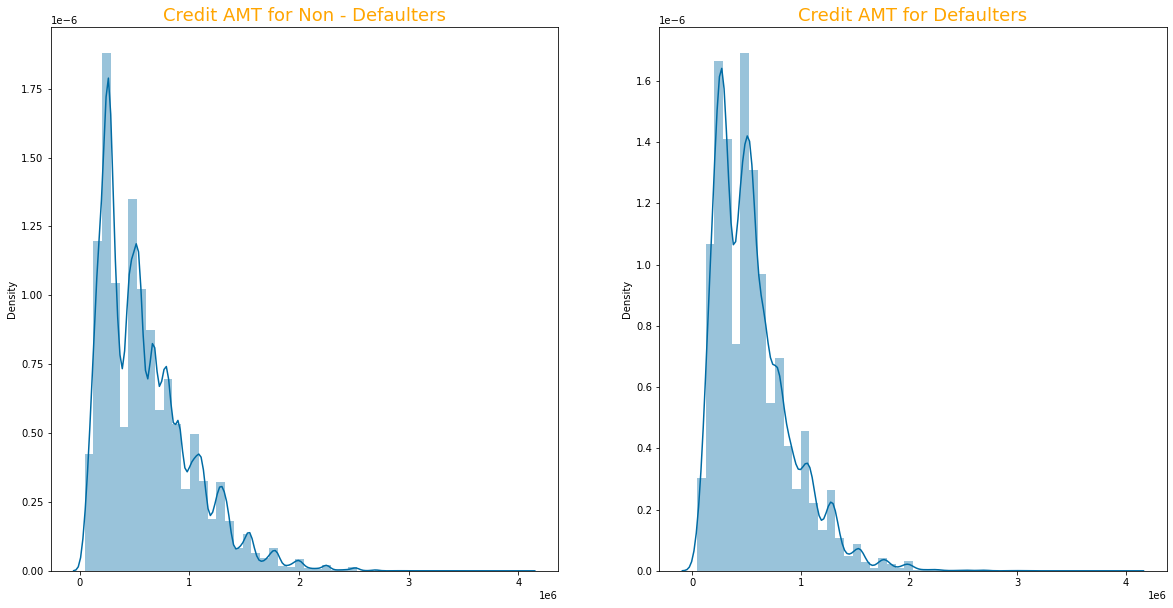

In [92]:
#Credit Amount for Defaulters and Non-Defaulters

f, ax = plt.subplots(1, 2, figsize=[20,10])

#plt.style.use('ggplot')
plt.style.use("tableau-colorblind10")

sns.distplot(ax=ax[0], x=target_0['AMT_CREDIT'])
sns.distplot(ax=ax[1], x=target_1['AMT_CREDIT'])

ax[0].set_title('Credit AMT for Non - Defaulters', fontsize = 18, color = 'Orange')
ax[1].set_title('Credit AMT for Defaulters', fontsize = 18, color = 'Orange')


plt.show()

####  We can observe that the distribution curve is not normal for both Defaulters and Non-Defaulters. We can say that the credit amount of the loan varies.

## 5.2 Bivariate Analysis

#### 5.2.1 'AMT_CREDIT' vs 'NAME_FAMILY_STATUS'

<Figure size 2160x720 with 0 Axes>

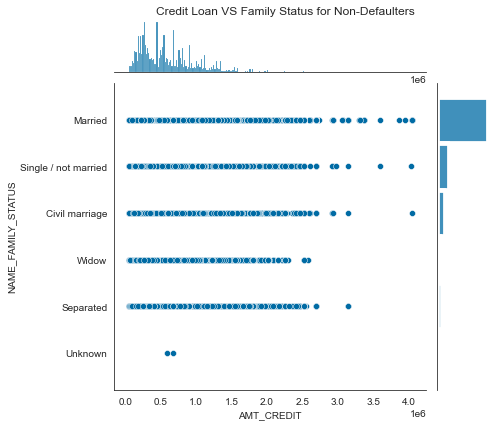

In [93]:
# Credit Loan VS Family Status for Non-Defaulters

plt.figure(figsize=[30,10])

sns.set_style('white')

p = sns.jointplot(x="AMT_CREDIT",y="NAME_FAMILY_STATUS", data=target_0)

plt.suptitle('Credit Loan VS Family Status for Non-Defaulters')
p.fig.subplots_adjust(top=0.95)

plt.show()

<Figure size 504x504 with 0 Axes>

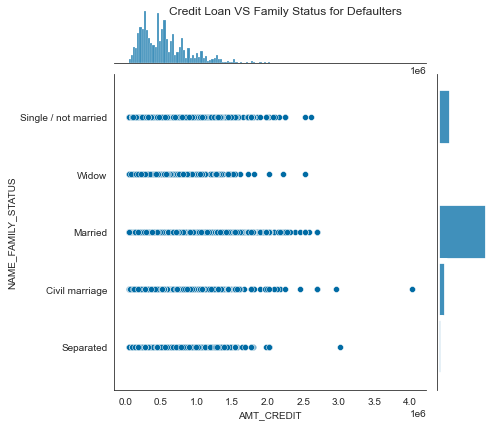

In [94]:
# Credit Loan VS Family Status for Defaulters

plt.figure(figsize=[7,7])

sns.set_style('white')

sns.jointplot(x="AMT_CREDIT",y="NAME_FAMILY_STATUS", data=target_1)

plt.suptitle('Credit Loan VS Family Status for Defaulters')
p.fig.subplots_adjust(top=0.95)

plt.show()

#### We can observe that peaple having Single/not married and Married Family Status who are non-defaulters have more credit loan amount as compared to defaulters.

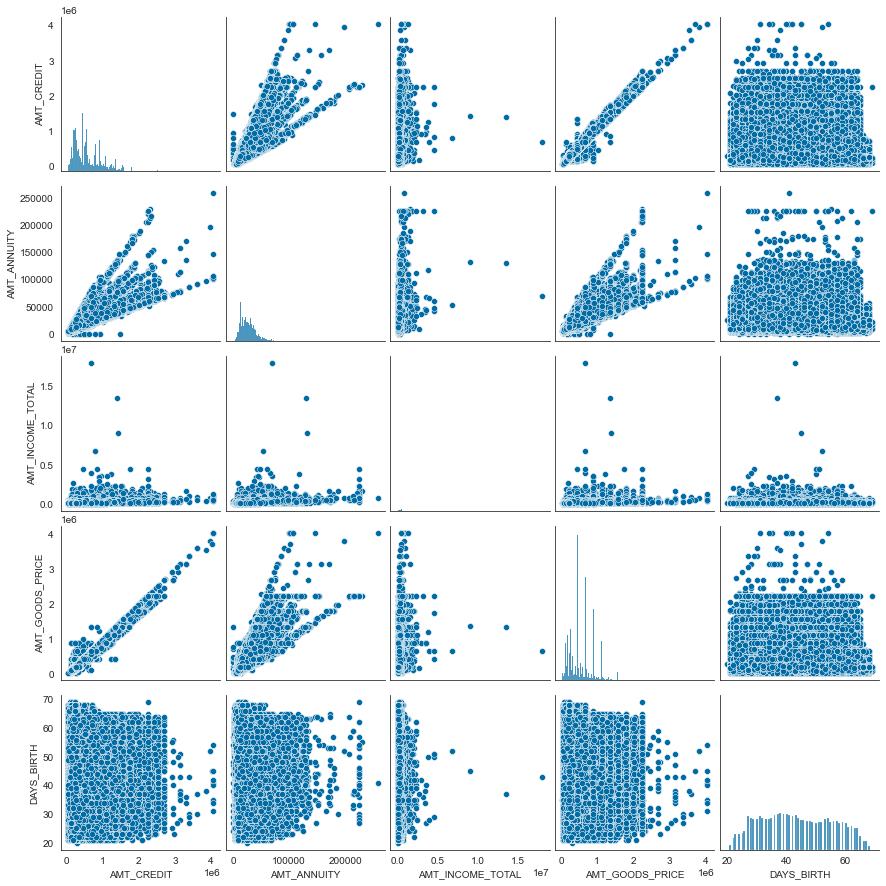

In [95]:
pair0 = target_0[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH']].fillna(0)
sns.pairplot(pair0)

plt.show()

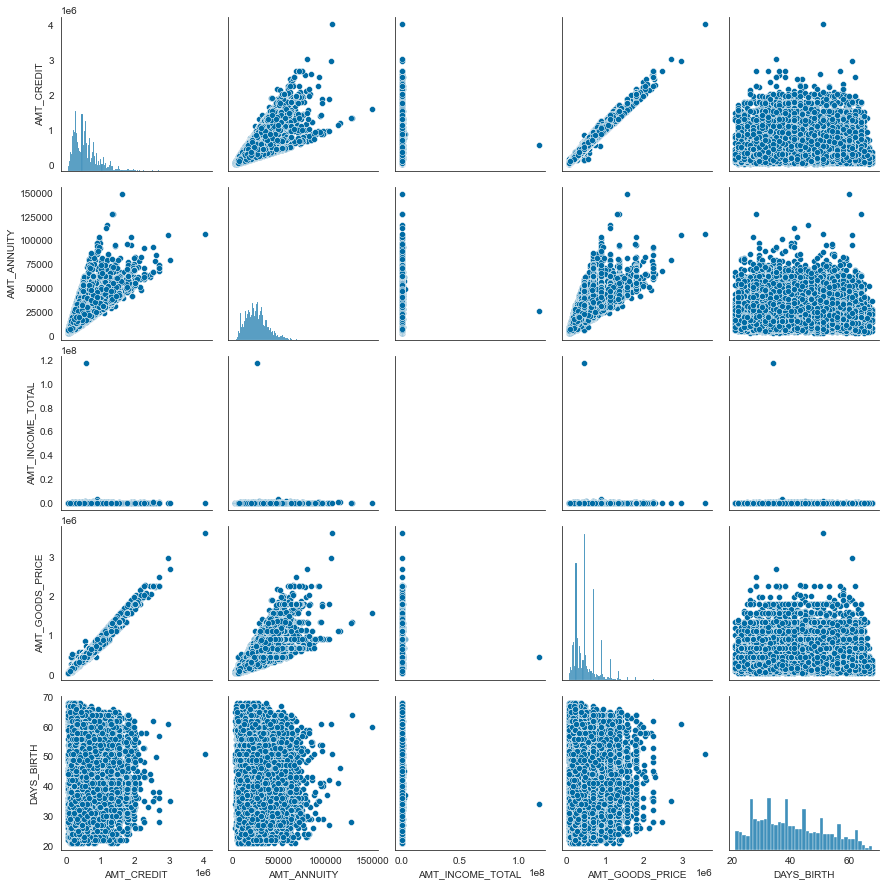

In [96]:
pair1 = target_1[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH']].fillna(0)
sns.pairplot(pair1)

plt.show()

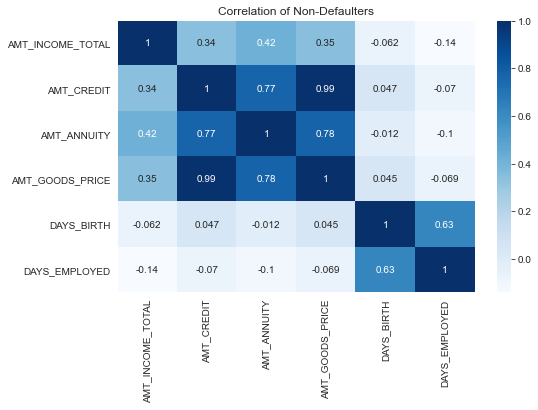

In [97]:
# plotting heatmap where TARGET = 0
cols0 = ['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED']
co_rel = target_0[cols0].corr()
plt.figure(figsize = (8,5))
sns.heatmap(co_rel, annot = True, cmap='Blues')
plt.title('Correlation of Non-Defaulters')
plt.show()

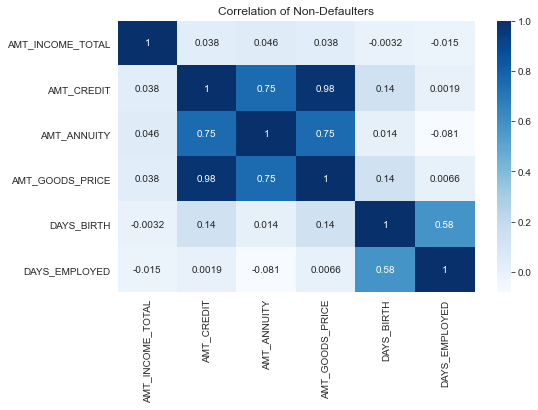

In [98]:
# plotting heatmap where TARGET = 1
col1 = ['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED']
co_rel = target_1[col1].corr()
plt.figure(figsize = (8,5))
sns.heatmap(co_rel, annot = True, cmap='Blues')
plt.title('Correlation of Non-Defaulters')
plt.show()

### Insights from both Pair plots and Heat Maps:
##### We observe that there is a high correlation between goods price and credit amounts.
##### Also we observe that the goods price with low amount have high loan annuity in defaulters.
##### In non-defaulters, people with all age groups tend to take higher credit loan as compared to non-defaulters.

In [99]:
corr_1 = target_1[['AMT_ANNUITY', 'AMT_GOODS_PRICE','DAYS_EMPLOYED','DAYS_BIRTH', 'DAYS_REGISTRATION','AMT_CREDIT', 'AMT_INCOME_TOTAL']].corr(method = 'pearson')
corr_1=corr_1.where(np.triu(np.ones(corr_1.shape),k=1).astype(np.bool))
corr_target_1=corr_1.unstack().reset_index()

corr_target_1.columns = ['VAR1','VAR2','CORRELATION']
corr_target_1.dropna(subset=['CORRELATION'],inplace=True)
corr_target_1['CORR_ABS']=corr_target_1['CORRELATION'].abs()

corr_target_1.sort_values('CORR_ABS', ascending=False).head(10)

,VAR1,VAR2,CORRELATION,CORR_ABS
36,AMT_CREDIT,AMT_GOODS_PRICE,0.982783,0.982783
7,AMT_GOODS_PRICE,AMT_ANNUITY,0.752295,0.752295
35,AMT_CREDIT,AMT_ANNUITY,0.752195,0.752195
23,DAYS_BIRTH,DAYS_EMPLOYED,0.582441,0.582441
31,DAYS_REGISTRATION,DAYS_BIRTH,0.289116,0.289116
30,DAYS_REGISTRATION,DAYS_EMPLOYED,0.192455,0.192455
22,DAYS_BIRTH,AMT_GOODS_PRICE,0.135532,0.135532
38,AMT_CREDIT,DAYS_BIRTH,0.135070,0.135070
14,DAYS_EMPLOYED,AMT_ANNUITY,-0.081207,0.081207
42,AMT_INCOME_TOTAL,AMT_ANNUITY,0.046421,0.046421


#### The above table shows the top 10 correlations for Defaulters, i.e client having payment difficulties which affect the business.

## 6. Previous Application DataSet

In [100]:
PreviousApp.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
PreviousApp.shape

(1670214, 37)

In [102]:
PreviousApp.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [103]:
PreviousApp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [104]:
# Storing columns starting with 'DAYS' into variable
days_col = [col for col in PreviousApp if col.startswith('DAYS')]
days_col

['DAYS_DECISION',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION']

In [105]:
PreviousApp[days_col] = abs(PreviousApp[days_col])

In [106]:
# XNA and XAP are replaced by NaN
PreviousApp=PreviousApp.replace('XNA', np.NaN)
PreviousApp=PreviousApp.replace('XAP', np.NaN)

In [107]:
PreviousApp.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,NaN,Approved,73,Cash through the bank,NaN,NaN,Repeater,Mobile,POS,NaN,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,42.0,300.0,42.0,37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,NaN,Approved,164,NaN,NaN,Unaccompanied,Repeater,NaN,Cash,x-sell,Contact center,-1,NaN,36.0,low_action,Cash X-Sell: low,365243.0,134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,NaN,Approved,301,Cash through the bank,NaN,"Spouse, partner",Repeater,NaN,Cash,x-sell,Credit and cash offices,-1,NaN,12.0,high,Cash X-Sell: high,365243.0,271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,NaN,Approved,512,Cash through the bank,NaN,NaN,Repeater,NaN,Cash,x-sell,Credit and cash offices,-1,NaN,12.0,middle,Cash X-Sell: middle,365243.0,482.0,152.0,182.0,177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,781,Cash through the bank,HC,NaN,Repeater,NaN,Cash,walk-in,Credit and cash offices,-1,NaN,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


## 6.1 Data Analysis

#### 6.1.1 NAME_CLIENT_TYPE

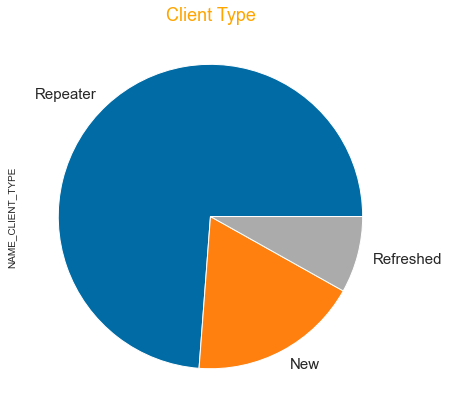

In [108]:
# Pie Chart for Client Type

plt.figure(figsize=[7,7])

PreviousApp['NAME_CLIENT_TYPE'].value_counts().plot(kind='pie', fontsize=15)

plt.title('Client Type', fontsize = 18, color = 'Orange')

plt.show()

#### We can observe that there is a huge amount of clients who are repeaters.

#### 6.1.2 NAME_CONTRACT_STATUS

In [109]:
PreviousApp.NAME_CONTRACT_STATUS.value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

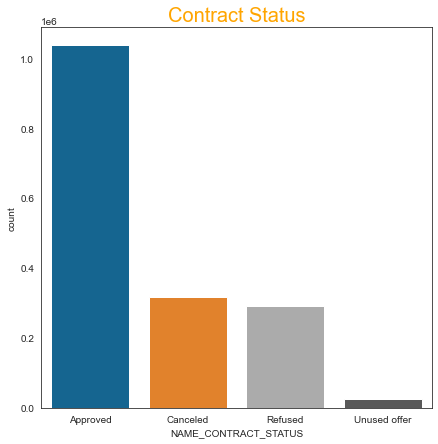

In [110]:
# Pie Chart for Contract Status

plt.figure(figsize=[7,7])

sns.countplot(x='NAME_CONTRACT_STATUS', data=PreviousApp, order=PreviousApp.NAME_CONTRACT_STATUS.value_counts().index)

plt.title('Contract Status', fontsize = 20, color = 'Orange')

plt.show()

#### We can observe that majority loans are approved. Also, Canceled and Refused Loans are almost equal.

#### 6.1.3 NAME_GOODS_CATEGORY

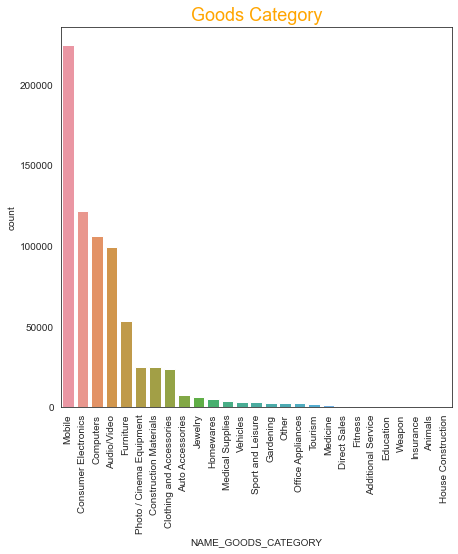

In [111]:
plt.figure(figsize=[7,7])

sns.countplot(x='NAME_GOODS_CATEGORY', data=PreviousApp, order=PreviousApp.NAME_GOODS_CATEGORY.value_counts().index)

plt.title('Goods Category', fontsize = 18, color = 'Orange')

plt.xticks(rotation = 90, fontsize = 10);

#### We observe that most of the loans were taken for Mobile, Consumer Electronics, Computers and Audio/Video.

## 6.2 Univariate Analysis

#### 6.2.1 AMT_ANNUITY, AMT_CREDIT and AMT_GOODS_PRICE

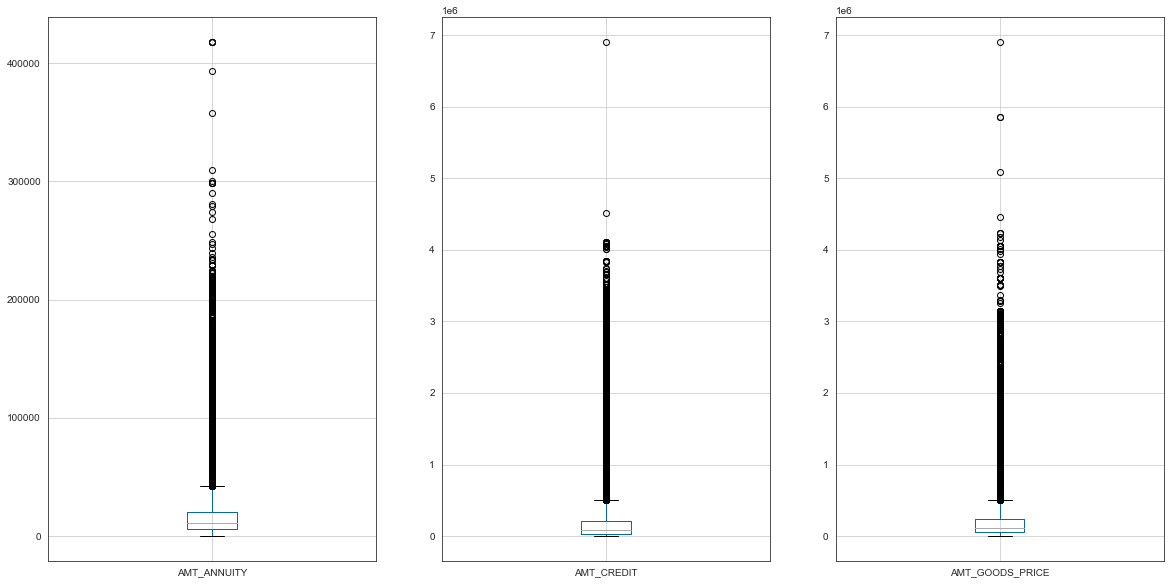

In [112]:
cols1 = ['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE']

plt.figure(figsize=(20,10))

for i, col in enumerate(cols1):
    plt.subplot(1,3, i+1)
    PreviousApp.boxplot(column = col, )
plt.show()

#### We can observe that there are some outliers in AMT_ANNUITY, AMT_CREDIT and AMT_GOODS_PRICE

## 6.3 Merging New and Previous Application DataSet

In [113]:
# Merging New and Previous App DataSet
App_merge = pd.merge(NewApp, PreviousApp, how='left', on=['SK_ID_CURR'])

App_merge.shape

(1430100, 111)

In [114]:
App_merge.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,...,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_BIRTH_CATEGORY,AMT_INCOME_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Very Young,MEDIUM,1038818.0,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9.0,Y,1.0,0.000000,NaN,NaN,NaN,Approved,606.0,NaN,NaN,NaN,New,Vehicles,POS,NaN,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,565.0,125.0,25.0,17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.746300,1.0,0.0,1.0,0.0,828.0,0,1,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Middle Age,HIGH,1810518.0,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12.0,Y,1.0,NaN,NaN,NaN,NaN,Approved,746.0,NaN,NaN,Unaccompanied,Repeater,NaN,Cash,x-sell,Credit and cash offices,-1.0,NaN,12.0,low_normal,Cash X-Sell: low,365243.0,716.0,386.0,536.0,527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.746300,1.0,0.0,1.0,0.0,828.0,0,1,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Middle Age,HIGH,2636178.0,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17.0,Y,1.0,0.000000,NaN,NaN,NaN,Approved,828.0,Cash through the bank,NaN,Family,Refreshed,Furniture,POS,NaN,Stone,1400.0,Furniture,6.0,middle,POS industry with interest,365243.0,797.0,647.0,647.0,639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.746300,1.0,0.0,1.0,0.0,828.0,0,1,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0

#### 6.3.1 Analysing Merged Data

<Figure size 1440x720 with 0 Axes>

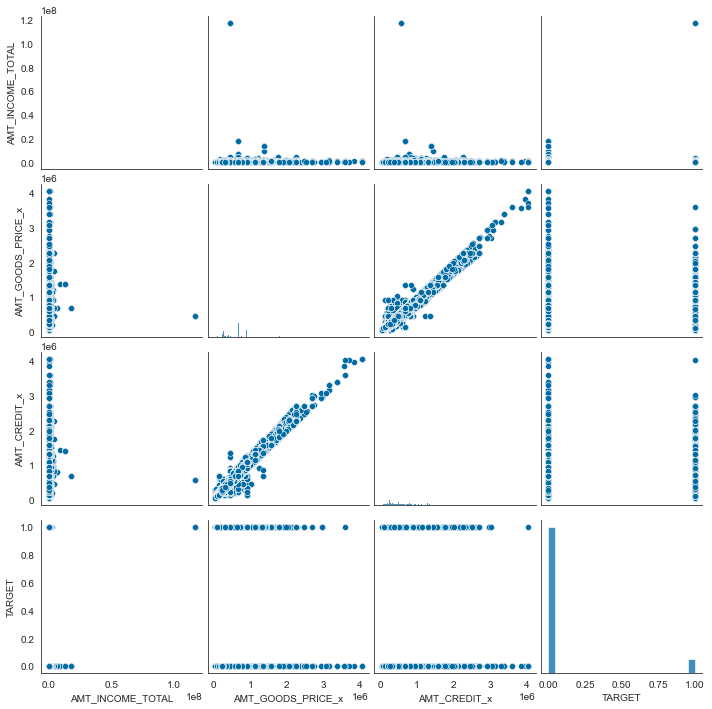

In [115]:
#Credit Amount for Defaulters and Non-Defaulters

plt.figure(figsize=(20,10))

pairs = App_merge[['CODE_GENDER', 'NAME_CONTRACT_STATUS', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE_x', 'AMT_CREDIT_x', 
                   'TARGET']].fillna(0)
sns.pairplot(pairs)

plt.show()

## 6.4 Bivariate Analysis

In [116]:
# Defining a function to plot bar charts for various combination of variables for analysis

def merge_analysis(a,b):
    
    Merged_New = App_merge.pivot_table(values='SK_ID_CURR', aggfunc='count', index = a, columns = b)
    Merged_New=Merged_New.div(Merged_New.sum(axis=1),axis='rows')*100
    
    sns.set()
    sns.set_style('whitegrid')
    Merged_New.plot(kind='bar',figsize=(15,5))
    
    plt.title(f'{a} Effect on Loan Approvals')
    
    plt.xlabel(f'{a}')
    plt.ylabel(f'{b}%')
                  
    plt.xticks(rotation = 0)
    
    plt.show()

#### 6.4.1 TARGET vs NAME_CONTRACT_STATUS

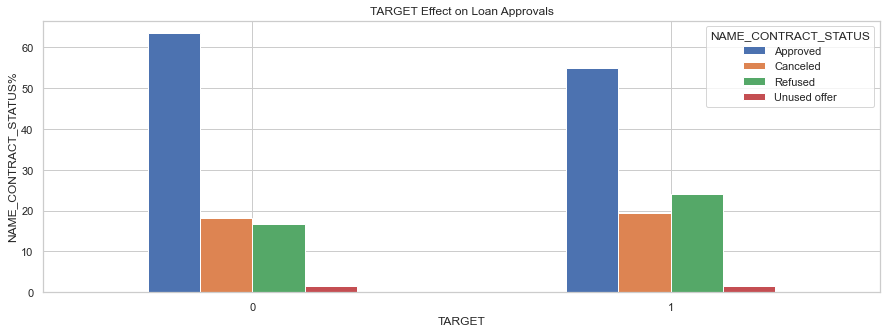

In [117]:
merge_analysis('TARGET','NAME_CONTRACT_STATUS')

#### We observe that there are more defaulters who had refused the loan offer previously as compared to non-defaulters.

#### 6.4.2 CODE_GENDER vs NAME_CONTRACT_STATUS

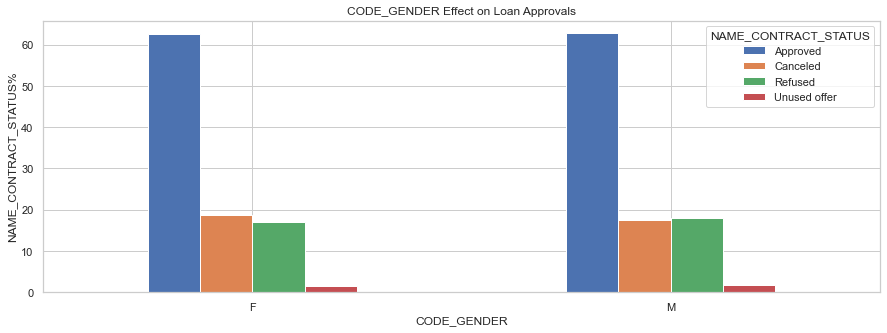

In [118]:
merge_analysis('CODE_GENDER','NAME_CONTRACT_STATUS')

#### We can observe that there is no much difference on the Contract Status with respect to Gender.